**Aufgabe 30:**

Schreiben Sie ein Programm, welches für ein gegebenes Runge-Kutta Verfahren mit Stabilitätsfunktion $R$ und ein gegebenes Rechteck $Q = \{ z \in \mathbb{C}: (\Re(z), \Im(z)) \in [a, b] \times [c, d] \}$ diejenigen $z \in Q$ grafisch hervorhebt, für die $|R(z)| \leq 1$ gilt.

Testen Sie dieses Programm mit bereits bekannten expliziten und impliziten Runge-Kutta Verfahren. Verwenden Sie unter anderem die Verfahren aus Remark 4.25 und Definition 4.31. Welche Rechtecke $Q$ sind interessant?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def programm(R, Q):

    """
        This program does, what is stated in "Aufgabe 30".
        R ... stability function
        Q ... interval (rectangle) of complex numbers, via discritisation of real intervals on real & imaginary axis
    """

    real = Q[0]
    imag = Q[1]

    cool_points = []

    for x in real:
        for y in imag:
            z = x + y * 1j
            if abs(R(z)) <= 1:
                cool_points += [(x, y)]

    return cool_points

In [3]:
# Various Stability Functions

stability_functions = []
names = []

# explicit Euler
R = lambda z: 1 + z
stability_functions += [R]
names += ['explicit Euler']

# implicit Euler
R = lambda z: 1/(1-z)
stability_functions += [R]
names += ['implicit Euler']

# Heun / modified Euler
R = lambda z: 1 + z + z**2 / 2
stability_functions += [R]
names += ['Heun / modified Euler']

# classical RK4
R = lambda z: 1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24
stability_functions += [R]
names += ['classical RK4']

In [4]:
a = -10
b = -a
c = -10
d = -c

dt = 0.1

Re = np.arange(a, b, dt)
Im = np.arange(c, d, dt)

Q = (Re, Im)

# ---------------------------------------------------------------- # 

Points $z$ in interval $[-10 + 10 \cdot i, -10 + 10 \cdot i]$ where $|R(z)| \leq 1$ ...


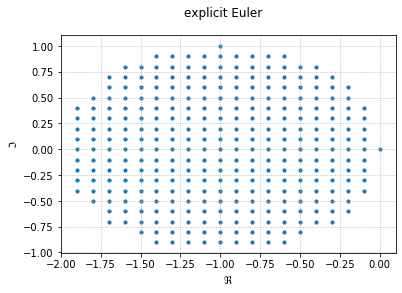

# ---------------------------------------------------------------- # 

Points $z$ in interval $[-10 + 10 \cdot i, -10 + 10 \cdot i]$ where $|R(z)| \leq 1$ ...


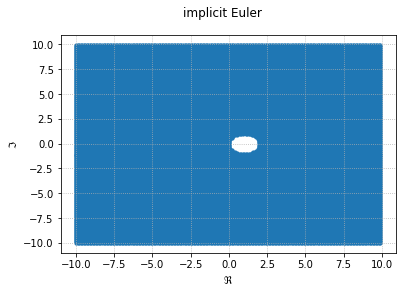

# ---------------------------------------------------------------- # 

Points $z$ in interval $[-10 + 10 \cdot i, -10 + 10 \cdot i]$ where $|R(z)| \leq 1$ ...


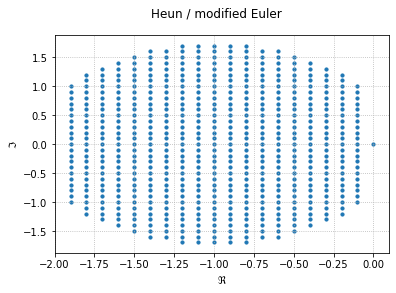

# ---------------------------------------------------------------- # 

Points $z$ in interval $[-10 + 10 \cdot i, -10 + 10 \cdot i]$ where $|R(z)| \leq 1$ ...


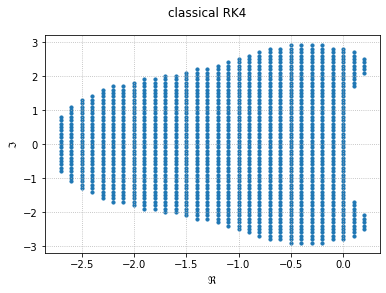

# ---------------------------------------------------------------- # 



In [6]:
print('#', '-'*64, '#', '\n')

for R, name in zip(stability_functions, names):

    txt = 'Points $z$ in interval $[{} + {} \cdot i, {} + {} \cdot i]$ where $|R(z)| \leq 1$ ...'.format(a, b, c, d)
    print(txt)

    cool_points = programm(R, Q)
    x, y = zip(*cool_points)

    plt.scatter(x, y, s = 10)

    plt.suptitle(name)
    plt.xlabel('$\Re$')
    plt.ylabel('$\Im$')

    plt.grid(linestyle = ':')

    plt.show()

    print('#', '-'*64, '#', '\n')